# 🍷 Wine Quality Prediction with Random Forest

This notebook demonstrates a simple machine learning workflow for predicting the quality of red wine using the Random Forest algorithm.

Binary classification is used: wines with quality score **≥ 7** are labeled as "good" (1), otherwise "not good" (0).


### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Load and Inspect the Dataset

In [3]:
red_wine_ds = pd.read_csv("./red wine/winequality-red.csv")
red_wine_ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine_ds.shape

(1599, 12)

In [5]:
red_wine_ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
red_wine_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## DATA VISUALISATION

NUMBER OF VALUES FOR EACH QUALITY

In [7]:
red_wine_ds['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

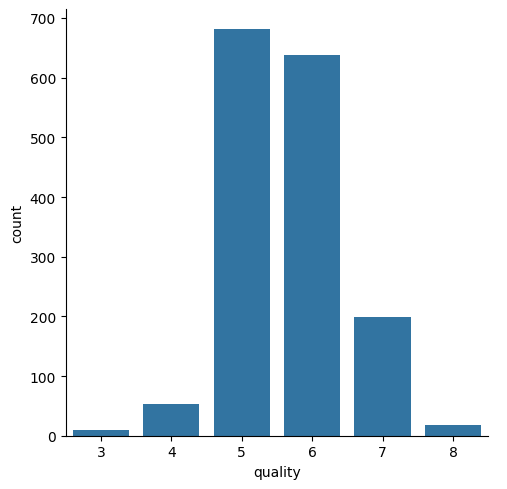

In [8]:
sns.catplot(x = 'quality', data = red_wine_ds, kind = 'count')

##### VOLATILE ACIDITY VS QUALITY

<Axes: xlabel='quality', ylabel='volatile acidity'>

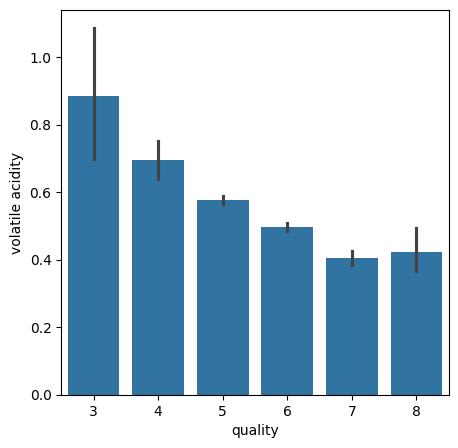

In [9]:
plot = plt.figure(figsize = (5, 5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = red_wine_ds)

##### CITRIC ACID VS QUALITY

<Axes: xlabel='quality', ylabel='citric acid'>

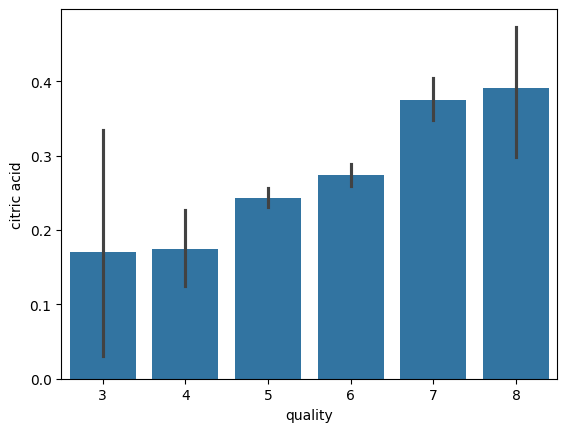

In [10]:
sns.barplot(x = 'quality', y = 'citric acid', data = red_wine_ds)

#### CORRELATION

In [11]:
correlation = red_wine_ds.corr()

<Axes: >

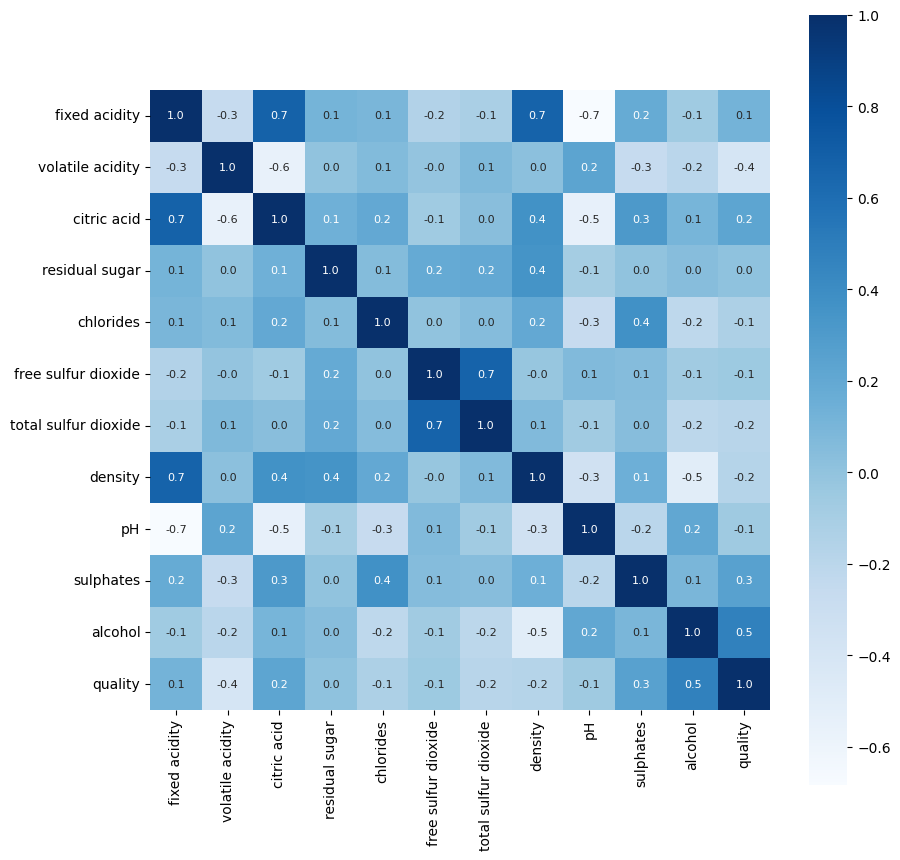

In [12]:
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, 
            annot_kws={'size':8}, cmap = 'Blues')

### Split data into features (X) and target (y)

In [13]:
X = red_wine_ds.drop('quality', axis = 1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

### Convert Wine Quality into Binary Labels

We convert the quality scores into binary labels:
- `1` for good wine (quality ≥ 7)
- `0` for not good wine (quality < 7)


In [14]:
y = red_wine_ds['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


## Split the Data

We split the dataset into features `X` and label `y`, and further divide it into training and test sets using an 80-20 split.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1279,) (320,)


## MODEL TRAINING

In [16]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

## MODEL EVALUATION

ACCURACY SCORE

In [ ]:
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy: ', test_accuracy)

Accuracy:  0.9375


In [18]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

cl = classification_report(y_test, y_pred)
print(cl)

[[278   5]
 [ 15  22]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       283
           1       0.81      0.59      0.69        37

    accuracy                           0.94       320
   macro avg       0.88      0.79      0.83       320
weighted avg       0.93      0.94      0.93       320



#### Plot confusion matrix heatmap

Text(95.72222222222221, 0.5, 'Truth')

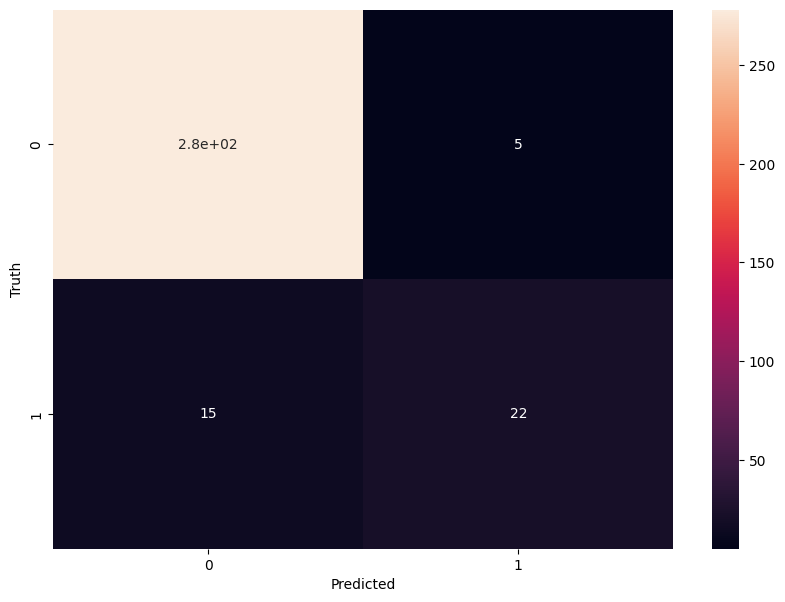

In [19]:
%matplotlib inline
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Feature Importance

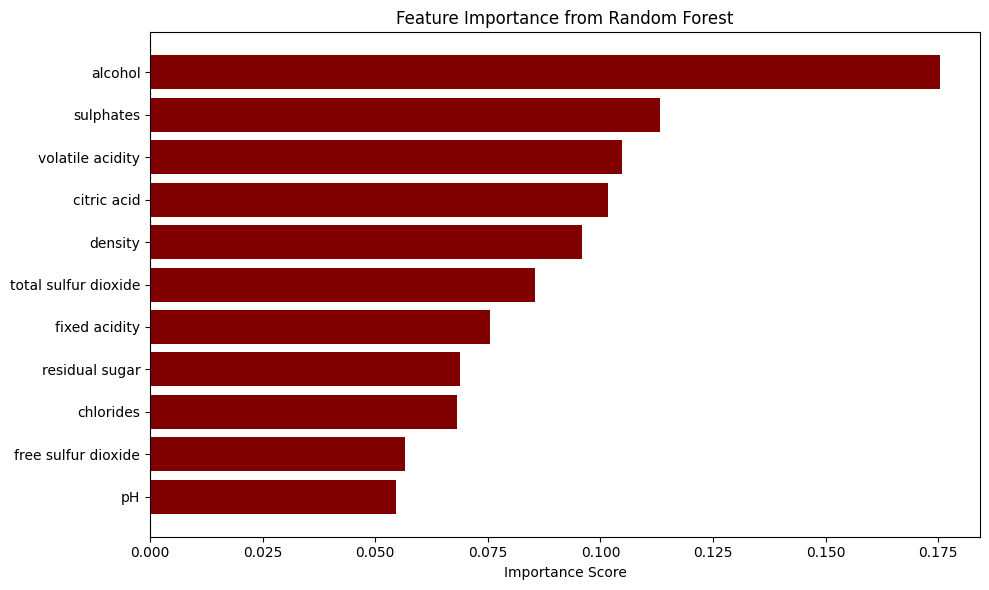

In [24]:

import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], color="maroon")
plt.xlabel("Importance Score")
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()


### SAVE THE MODEL

In [20]:
import pickle
pickle.dump(model, open('red_wine_binary_model.pkl', 'wb'))

## RED WINE PREDICITON SYSTEM

In [28]:
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
input_data = (2.5,0.5,0.36,6.1,0.071,17.0,52.0,0.9978,3.35,0.8,6.2)

input_df = pd.DataFrame([input_data], columns=feature_names)

prediction = model.predict(input_df)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine
